In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [6]:
# train_df['Embarked'] = train_df['Embarked'].replace({
#     'S': 'Southampton',
#     'C': 'Cherbourg',
#     'Q': 'Queenstown'
# })

In [7]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
410,411,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
272,273,1,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
645,646,1,1,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


In [10]:
#display 10 rows and 5 random columns
train_df[['PassengerId','Name','Sex','Age']].head(10)

,PassengerId,Name,Sex,Age
0,1,"Braund, Mr. Owen Harris",male,22.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,3,"Heikkinen, Miss. Laina",female,26.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,5,"Allen, Mr. William Henry",male,35.0
5,6,"Moran, Mr. James",male,NaN
6,7,"McCarthy, Mr. Timothy J",male,54.0
7,8,"Palsson, Master. Gosta Leonard",male,2.0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


In [11]:
#find value count of Sex and Embarked
train_df['Sex'].value_counts()
train_df['Embarked'].value_counts(
)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [12]:
#Find all passengers under 18 and over 60; count both groups.
under_18 = train_df[train_df['Age']<18].count()['Name']
over_60 = train_df[train_df['Age']>60].count()['Name']
print("People under 18:",under_18,"and over 60:",over_60)

People under 18: 113 and over 60: 22


In [13]:
#Sort passengers by Fare in descending order. Show the 7 people who paid the most.
train_df.sort_values(by='Fare',ascending=False).head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [14]:
#Set PassengerId as the DataFrame index, then reset it to default.
train_df.set_index('PassengerId',inplace=False)
train_df.reset_index(inplace=False)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
293,294,0,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S
387,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S


In [16]:
#Which columns have missing values? For each, how many?
#Fill missing Age with the median age. Fill missing Embarked with mode.
#Drop the Cabin column and display the new shape.
train_df[['Age','Cabin','Embarked']].isnull()
train_df.fillna({'Age': train_df['Age'].mean()}, inplace=True)
train_df.fillna({'Embarked': train_df['Embarked'].mode()[0]}, inplace=True)
train_df.drop(['Cabin'],axis=1,inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
#Calculate the survival rate for each sex using .groupby().
train_df.groupby(by=['Sex'])['Survived'].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [18]:
#Create a pivot table showing, for each Pclass, the average Age, average Fare, and survival rate.
pd.pivot_table(train_df, values='Survived', index='Sex', columns='Pclass',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [19]:
#Create a FamilySize column (SibSp + Parch + 1).
train_df['FamilySize'] = train_df['SibSp']+train_df['Parch']+1
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [20]:
#Add a boolean IsAlone column (True if FamilySize == 1).
train_df['IsAlone'] = train_df['FamilySize'] == 1
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,4,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,True


In [21]:
#Make a new column Title (extract from Name, e.g., "Mr", "Mrs", "Miss", etc.).
train_df['Title'] = train_df['Name'].str.extract(r'(Mr|Mrs|Miss|Master)', expand=False)
#Get all columns
cols = train_df.columns.tolist()

# Remove 'Title' and insert it just before 'Name'
cols.insert(cols.index('Name'), cols.pop(cols.index('Title')))

# Reorder DataFrame
train_df = train_df[cols]
train_df

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,Mr,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,False
1,2,1,1,Mr,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,False
2,3,1,3,Miss,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,True
3,4,1,1,Mr,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,False
4,5,0,3,Mr,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,NaN,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,True
887,888,1,1,Miss,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,True
888,889,0,3,Miss,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,4,False
889,890,1,1,Mr,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,True


In [22]:
train_df.isna().sum()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Title        867 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    bool   
dtypes: bool(1), float64(2), int64(6), object(5)
memory usage: 91.5+ KB


In [23]:
#Replace rare titles in the Title column with 'Other'. List unique titles after this.
train_df['Title'] = train_df['Title'].fillna(value='Other')
train_df

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,Mr,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,False
1,2,1,1,Mr,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,False
2,3,1,3,Miss,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,True
3,4,1,1,Mr,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,False
4,5,0,3,Mr,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Other,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,True
887,888,1,1,Miss,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,True
888,889,0,3,Miss,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,4,False
889,890,1,1,Mr,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,True


In [24]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
796,797,1,1,Other,"Leader, Dr. Alice (Farnham)",female,49.000000,0,0,17465,25.9292,S,1,True
769,770,0,3,Mr,"Gronnestad, Mr. Daniel Danielsen",male,32.000000,0,0,8471,8.3625,S,1,True
112,113,0,3,Mr,"Barton, Mr. David John",male,22.000000,0,0,324669,8.0500,S,1,True
64,65,0,1,Mr,"Stewart, Mr. Albert A",male,29.699118,0,0,PC 17605,27.7208,C,1,True
16,17,0,3,Master,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,Q,6,False


In [25]:
#One-liner: Among survivors <16 years old, group by Pclass and Sex, and calculate their median fare.
train_df[(train_df['Survived']==1) & (train_df['Age']<16)].groupby(by=['Sex','Pclass']).Fare.median()

Sex     Pclass
female  1         165.66875
        2          27.00000
        3          13.93545
male    1         120.00000
        2          26.00000
        3          15.90000
Name: Fare, dtype: float64

In [26]:
#Chain .groupby('Title'), compute mean survival rate and mean fare, sort by survival rate (descending).
train_df.groupby('Title')[['Survived', 'Fare']].mean().sort_values('Survived', ascending=False)

,Survived,Fare
Title,,
Miss,0.697802,43.797873
Master,0.575000,34.703125
Other,0.375000,37.915625
Mr,0.283721,28.565328


C:\Users\vatsa\AppData\Local\Temp\ipykernel_17388\134050418.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_sex = train_df.groupby(['AgeBin', 'Sex'])['Survived'].mean().unstack()


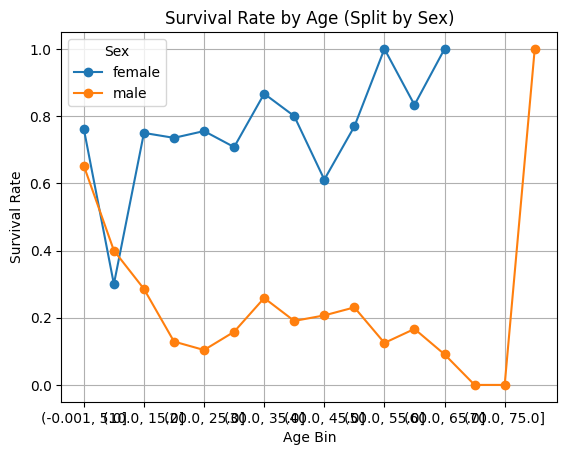

In [27]:
# Create age bins to smooth the plot
age_bins = range(0, 81, 5)
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=age_bins, include_lowest=True)

# Compute survival rate by age bin and sex
survival_by_age_sex = train_df.groupby(['AgeBin', 'Sex'])['Survived'].mean().unstack()

# Plot as a line plot
survival_by_age_sex.plot(kind='line', marker='o')
plt.title('Survival Rate by Age (Split by Sex)')
plt.xlabel('Age Bin')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

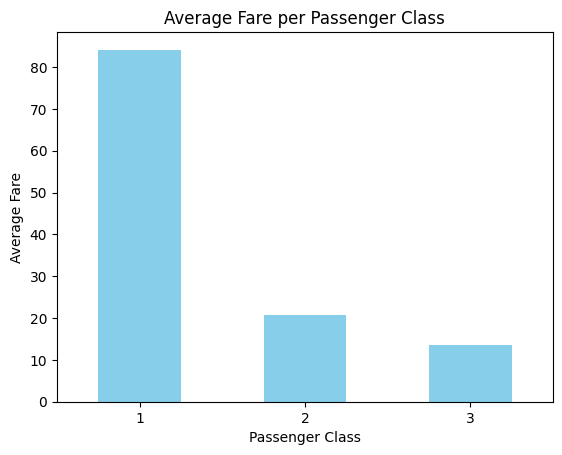

In [28]:
# Group by Pclass and calculate mean fare
avg_fare_per_class = train_df.groupby('Pclass')['Fare'].mean()

# Plot
avg_fare_per_class.plot(kind='bar', color='skyblue')
plt.title('Average Fare per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()


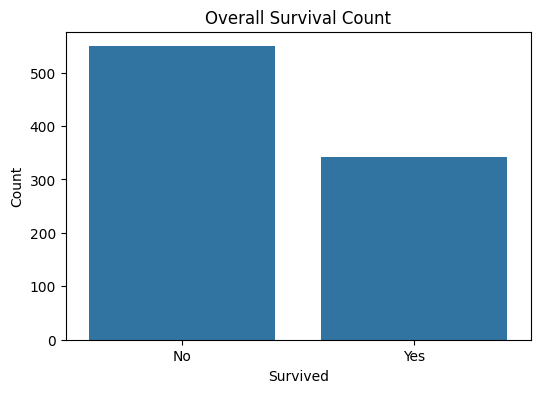

In [29]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train_df)
plt.title('Overall Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()


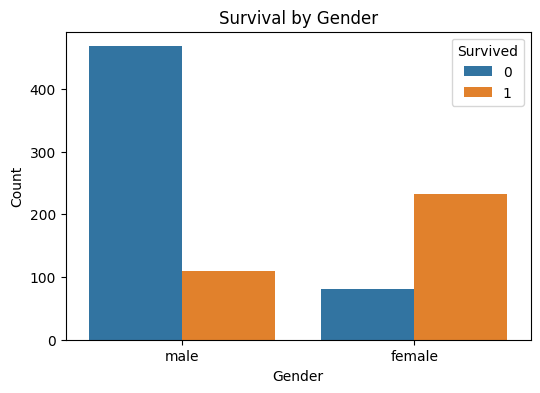

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

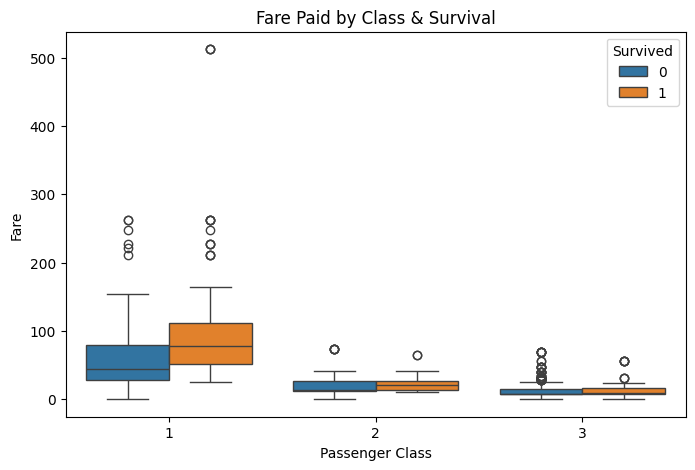

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train_df)
plt.title('Fare Paid by Class & Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()